## Difference In Differences
- Difference In Differences는 준 실험 방법 가운데 가장 많이 활용되는 분석이다.
  - Random Assignment와 유사하게 작동하는 Treatment Assignment Mechanism을 모방하여 분석하는 방법이다.

- 따라서 이중차분은 다음의 가정을 만족해야 된다.

  - 실험군과 대조군의 시간에 따른 추세는 평행하다.

    - 실험군의 counterfactual도 평행을 따를 것이라는 믿음이 있어야 된다.

### Difference In Differences Model
- 이중 차분의 방적식은 다음과 같다.
  
  - $Control\;Group\;Pre: \alpha$
  
  - $Treatment\;Group\;Pre: \alpha+\beta$
  
  - $Control\;Group\;Post: \alpha+\tau$

  - $Treatment\;Group\;Post: \alpha+\beta+\tau+\delta$
\begin{align}
y_{it} =\alpha+\beta D_{i}+\tau Post_{t}+\delta (D_i \times Post_t)+\varepsilon_{it}
\end{align}

- 위 방정식에서 우리가 관심있어 하는 대상은 $\delta$ 이다.

  - 아래 식을 보면 이전에 공부했던 Two -Way Fixed Effects의 계산과정과 동일하다
\begin{align}
\delta &= (Treatment\;Group\;Post-Control\;Group\;Post) - (Treatment\;Group\;Pre-Control\;Group\;Pre)\\
&=([\alpha+\beta+\tau+\delta] - [\alpha+\tau]) - ([\alpha+\beta]-[\alpha])\\
&= (\beta+\delta)-\beta
\end{align}

- 이중차분을 potential outcomes 관점에서 생각해보면 $\delta$는 ATT를 구하는 것이며, Treatment Group과 Control Group이 서로 평행해야 한다는 가정이 있어야 된다는 사실을 알 수 있다.

  - 왜 그런지 살펴보도록 하자.
\begin{align}
\widehat{\delta}^{2\times 2}_{kU} &= \bigg ( \overline{y}_k^{post(k)} - \overline{y}_k^{pre(k)} \bigg ) - \bigg ( \overline{y}_U^{post(k)} - \overline{y}_U^{pre(k)} \bigg )\\
&=\bigg ( \underbrace{E\big[Y^1_k  \vert Post\big] - E\big[Y^0_k  \vert Pre\big] \bigg ) - \bigg(E\big[Y^0_U  \vert Post\big] - E\big[ Y^0_U  \vert Pre\big]}_{\text{Switching equation}} \bigg) \\
&+ \underbrace{E\big[Y_k^0  \vert Post\big] - E\big[Y^0_k  \vert Post\big]}_{\text{Adding zero}} \\
&= \underbrace{E\big[Y^1_k \vert Post\big] - E\big[Y^0_k \vert Post\big]}_{\text{ATT}} \\
&+\Big[\underbrace{E\big[Y^0_k \vert Post\big] - E\big[Y^0_k \vert Pre\big] \Big] - \Big[E\big[Y^0_U \vert Post\big] - E\big[Y_U^0 \vert Pre\big] }_{\text{Non-parallel trends bias in $2\times 2$ case}} \Big]
\end{align}

- 위에서 살펴본 방정식은 동일한 시점에서 처치를 받은 표준적인(Canonical) 이중차분 방정식이다. 하지만 현실적으로 각 Group마다 다른 시점에서 처치를 받을 가능성이 더 많기 때문에 Staggered DID 모형에 대해서도 알아야 한다.

  - Staggered DID

    -  Treat가 0이면 Control Group이 0이므로 $Post_{it}$만 정의되기 때문에 interaction을 고려하지 않는다.
\begin{align}
y_{it} &=\alpha+\beta D_{i}+\tau Post_{it}+\delta (D_i \times Post_{it})+\varepsilon_{it}\\
&=\alpha+\beta D_{i}+\tau' Post_{it}+\varepsilon_{it}
\end{align}
  - Staggered DID with Two - Way Fixed Effects

    - 사실 $u_i$에 의해서 $\alpha+\beta D_{i}$가 흡수되기 때문에 Staggered DID 방정식의 추정치와 동일하다.
\begin{align}
y_{it} =\tau' Post_{it}+u_i +\theta_t +\varepsilon_{it}
\end{align}

### Providing Evidence for Parallel Trends
- 이중차분의 문제점은 Treatment Group이 Treatment 시점 이후, 만약 Treatment을 받지 않았더라면 있었을 결과(Counterfactual)를 관측할 수 없다는 것이다.
  
  - 즉, Treatment 시점 이전에서의 Treatment Group과 Control Group의 평행 추세는 검증할 수 있지만, Treatment 시점 이후의 평행 추세는 검증하기 어렵다.
  
- Treatment 이전의 평행 추세를 검증하는 방법에는 크게 두 가지 방법이 있다.
  
  - 시각적 방법: Canonical DID 분석에서는 Treatment Group과 Control Group의 Treatment 전 평행 추세를 그래프로 확인할 수 있다.
  
  - Event Study: Staggered DID with Two - Way Fixed Effects 분석에서는 시차가 서로 다르기 때문에 그래프로 확인하기 어렵다. 따라서 Treatment 전과 후의 ATT를 모두 구해서 Treatment 전의 ATT가 0으로 추정되는지 살펴볼 수 있다.
  
    - 표준적인 Event Study 모델의 방정식은 다음과 같다.
\begin{align}
Y_{its} = \gamma_s + \lambda_t + \sum_{\tau=-q}^{-1}\gamma_{\tau}D_{s\tau} + \sum_{\tau=0}^m\delta_{\tau}D_{s\tau}+x_{ist}+ \varepsilon_{ist}
\end{align}

#### Event Study Example

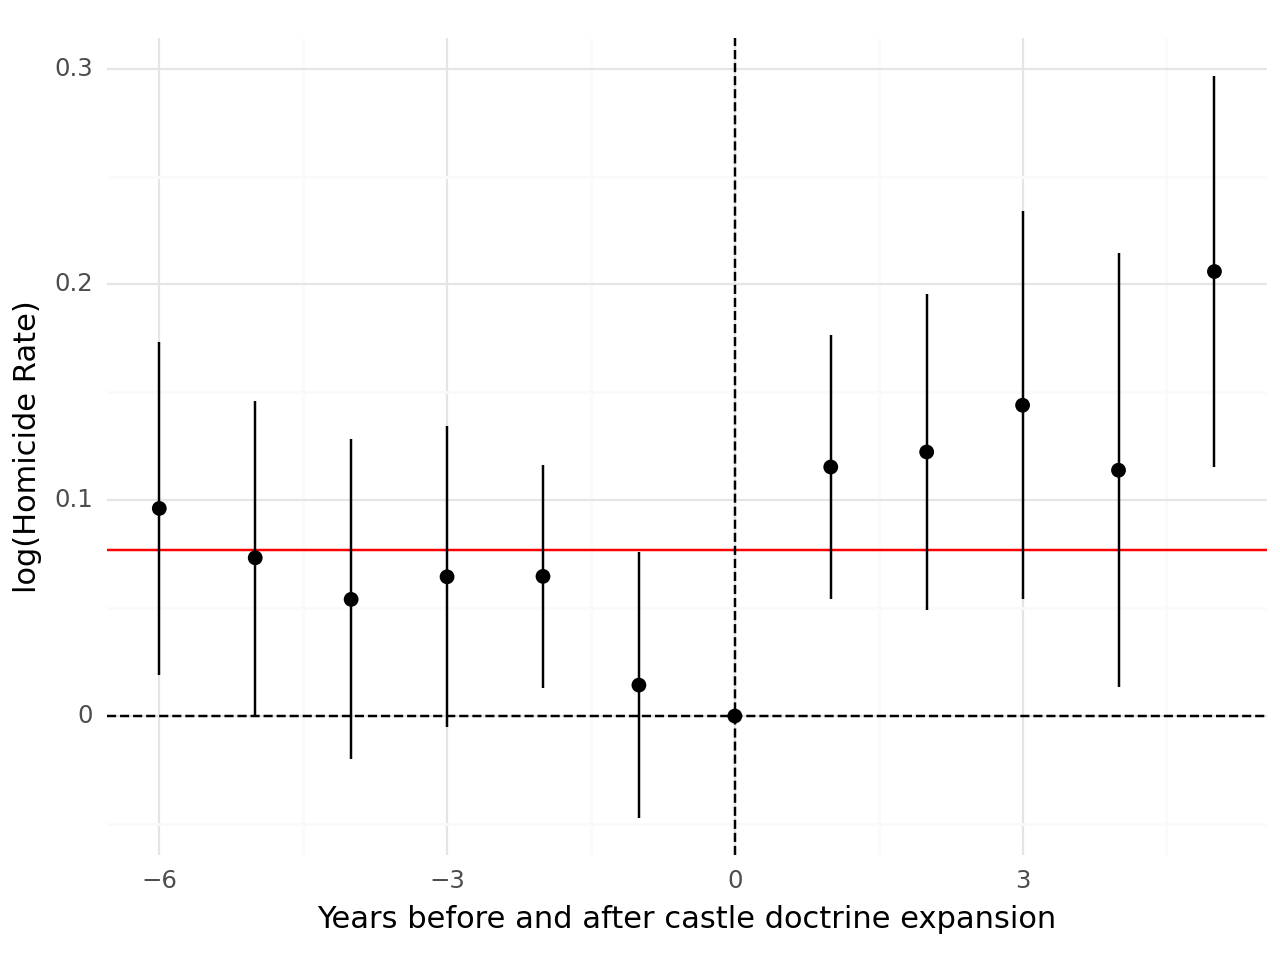

<Figure Size: (640 x 480)>

In [15]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)

castle = read_data('castle.dta')

castle['time_til'] = castle['year'] - castle['treatment_date']

castle['lead1'] = castle['time_til'] == -1
castle['lead2'] = castle['time_til'] == -2
castle['lead3'] = castle['time_til'] == -3
castle['lead4'] = castle['time_til'] == -4
castle['lead5'] = castle['time_til'] == -5
castle['lead6'] = castle['time_til'] == -6
castle['lag0'] = castle['time_til'] == 0 
castle['lag1'] = castle['time_til'] == 1 
castle['lag2'] = castle['time_til'] == 2 
castle['lag3'] = castle['time_til'] == 3 
castle['lag4'] = castle['time_til'] == 4 
castle['lag5'] = castle['time_til'] == 5 

formula = "l_homicide ~ r20001 + r20002 + r20003 + r20011 + r20012 + r20013 + r20021 + r20022 + r20023 + r20031 + r20032 + r20033 + r20041 + r20042 + r20043 + r20051 + r20052 + r20053 + r20061 + r20062 + r20063 + r20071 + r20072 + r20073 + r20081 + r20082 + r20083 + r20091 + r20092 + r20093 + lead1 + lead2 + lead3 + lead4 + lead5 + lead6 + lag1 + lag2 + lag3 + lag4 + lag5 + C(year) + C(state)"

event_study_formula = smf.wls(formula,
            data = castle, weights = castle['popwt']).fit(cov_type='cluster', cov_kwds={'groups':castle['sid']})


leads = ['lead6[T.True]', 'lead5[T.True]', 'lead4[T.True]', 'lead3[T.True]', 'lead2[T.True]', 'lead1[T.True]']
lags = ['lag1[T.True]', 'lag2[T.True]', 'lag3[T.True]', 'lag4[T.True]', 'lag5[T.True]']

leadslags_plot = pd.DataFrame({
    'sd' : np.concatenate([np.sqrt(np.diag(event_study_formula.cov_params().loc[leads][leads])), np.array([0]), np.sqrt(np.diag(event_study_formula.cov_params().loc[lags][lags]))]),
    'mean':  np.concatenate([event_study_formula.params[leads], np.array([0]), event_study_formula.params[lags]]),
    'label': np.arange(-6, 6)}) 

leadslags_plot['lb'] = leadslags_plot['mean'] - leadslags_plot['sd']*1.96
leadslags_plot['ub'] = leadslags_plot['mean'] + leadslags_plot['sd']*1.96

# This version has a point-range at each estimated lead or lag
# comes down to stylistic preference at the end of the day!
p.ggplot(leadslags_plot, p.aes(x = 'label', y = 'mean',
             ymin = 'lb', 
             ymax = 'ub')) +\
    p.geom_hline(yintercept = 0.0769, color = "red") +\
    p.geom_pointrange() +\
    p.theme_minimal() +\
    p.xlab("Years before and after castle doctrine expansion") +\
    p.ylab("log(Homicide Rate)") +\
    p.geom_hline(yintercept = 0,
             linetype = "dashed") +\
    p.geom_vline(xintercept = 0,
             linetype = "dashed")

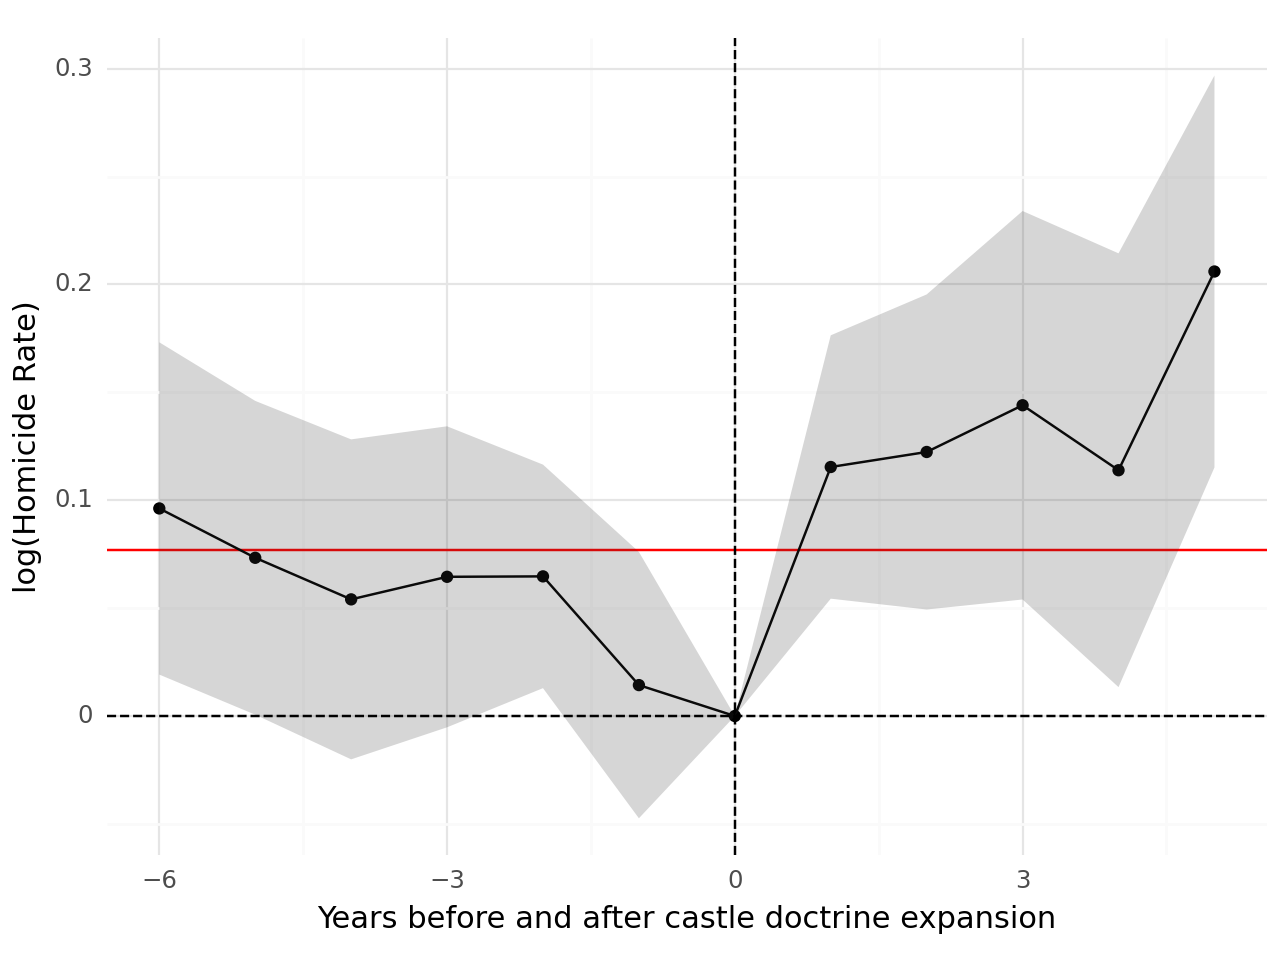

<Figure Size: (640 x 480)>

In [10]:
# This version has a point-range at each estimated lead or lag
# comes down to stylistic preference at the end of the day!
p.ggplot(leadslags_plot, p.aes(x = 'label', y = 'mean',
             ymin = 'lb', 
             ymax = 'ub')) +\
    p.geom_hline(yintercept = 0.0769, color = "red") +\
    p.geom_line() +\
    p.geom_point() +\
    p.geom_ribbon(alpha = 0.2) +\
    p.theme_minimal() +\
    p.xlab("Years before and after castle doctrine expansion") +\
    p.ylab("log(Homicide Rate)") +\
    p.geom_hline(yintercept = 0,
             linetype = "dashed") +\
    p.geom_vline(xintercept = 0,
             linetype = "dashed")

### Adjusting for Parallel Trends
- 만약 Parallel Trends를 만족하지 않는 경우, Fixed Effect Model처럼 교란변수를 DID 모델에 추가하여 보정함으로써 Parallel Pre Trends를 검증할 수 있다.
  
- 하지만, Fixed Model과 같이 통제 변수를 regression에 추가할 때 Post-Treatment Bias 문제가 발생하기도 한다.

    - 예를 들어 Confounder 상황이라면 문제가 되지 않지만, Collider인 경우도 존재하기 때문이다.

- 따라서 Post-Treatment Bias가 있을 것으로 예상 된다면, 다음과 같은 방법들을 고려해야 된다.

    - Matching using pre-Treatment

    - Inverse Probability Weighting

    - Doubly robust DID

    - Group-Specific Time Trends
    
        - 각 unit마다 서로 다른 Time Trend가 존재할 경우, 해당 방법을 활용할 수 있다.

### Goodman - Bacon Decomposition
- DID with Two - Way Fixed Effects 모델에서 $ATT$를 추정할 때, Bias를 확인할 수 있는 방법중 많이 사용되는 방법은 Bacon Decomposition 이다.
    - Bacon Decomposition 방법을 활용하여 **각 그룹간 비교의 가중치** 와 **이질성**을 확인할 수 있다.

        - 가중치의 값을 보면서 $ATT$가 어느 그룹 비교에 중점을 두는지 알 수 있다.
        
        - 각 그룹간 $ATT$를 확인하면서 이질적인 편향이 존재하는지 알 수 있다.

- Two-Way Fixed Effects의 추정치($\delta$)는 두 그룹간의 가중평균과 동일하다.

- 예시로 3개의 집단이 있을 때, Bacon Decomposition 방법으로 확인해 보자.

    - $Early\; Treatment\; Group\; k$
        
    - $Late\; Treatment\; Group\; \ell$

    - $Untreated(Control)\; Group\;$
\begin{align}
\hat{\delta}^{DD} = s_{ku}\hat{\delta}_{ku} + s_{\ell U}\hat{\delta}_{\ell U} + s_{k\ell}\hat{\delta}_{k\ell} + s_{\ell k}\hat{\delta}_{\ell k}
\end{align}

- $s$는 표본크기와 처치 이후의 비율에 따라 결정된다. 

\begin{align}
s = \frac{ (subsample\;share)^2(subsample\; variance\; of FE-adjusted\; D)}{total\; variance\; of\; FE-adjusted\; D}
\end{align}

\begin{align}
s_{kU} &= \frac{ (n_k + n_U)^2 n_{kU} (1 - n_{kU}) \bar{D}_k (1 - \bar{D}_k)}{\hat{V}^D}\\

s_{lU} &= \frac{ (n_l + n_U)^2 n_{lU} (1 - n_{lU}) \bar{D}_l (1 - \bar{D}_l)}{\hat{V}^D}\\

s_{kl} &= \frac{((n_k + n_l)(1 - \bar{D}_l))^2  n_{kl} (1 - n_{kl}) \frac{\bar{D}_k - \bar{D}_l}{1 - \bar{D}_l} \frac{1 - \bar{D}_k}{1 - \bar{D}_l}  }{\hat{V}^D}\\

s_{lk} &= \frac{ ((n_k + n_l)\bar{D}_e))^2  n_{kl} (1 - n_{kl}) \frac{\bar{D}_l}{\bar{D}_k} \frac{\bar{D}_k - \bar{D}_l}{1 - \bar{D}_k}  }{\hat{V}^D}
\end{align}

- Potential Framework 관점에서 편향을 확인해 보자.

- $k$와 $U$의 관계 ($l$과 $U$의 관계도 아래 식과 유사하다)
\begin{align}
\widehat{\delta}^{2\times 2}_{kU}
&=\underbrace{E\big[Y^1_k  \vert Post\big] - E\big[Y^0_k  \vert Post\big]}_{\text{ATT}} \\
&+\bigg [ \underbrace{E\big[Y^0_k  \vert Post\big] - E\big[Y^0_k  \vert Pre\big]\bigg]-
\bigg [E\big[Y^0_U  \vert Post\big] -
E\big[Y_U^0  \vert Pre\big] }_{\text{Non-parallel trends bias in $2\times 2$ case}} \bigg ]\\
&= ATT_{k}(Post) + \underbrace{\Delta Y^0_{k}(Post,Pre) -
\Delta Y^0_{U}(Post,Pre)}_{\text{Selection bias!}}
\end{align}
    - $k$와 $l$의 관계
\begin{align}
\widehat{\delta}^{2\times 2}_{kl} &= ATT_k(MID) + \Delta Y^0_k(MID,Pre) - \Delta Y^0_l(MID, Pre)
\end{align}

    - $l$과 $k$의 관계
\begin{align}
\widehat{\delta}^{2\times 2}_{lk} &=
ATT_{l}(Post(l)) \nonumber
\\
&+ \underbrace{\Delta Y^0_l(Post(l),MID) - \Delta Y^0_k (Post(l), MID)}_{\text{Parallel-trends bias}} \nonumber
\\
& - \underbrace{(ATT_k(Post(l)) - ATT_k(Mid))}_{\text{Heterogeneity in time bias!}}
\end{align}
- 즉, Potential Framwork 관점에서 $\delta$를 분해하면 다음과 같다.
\begin{align}
p\lim\widehat{\delta}^{DD}_{n\to\infty} =
VWATT + VWCT - \Delta ATT
\end{align}

- $VWCT$
    - 위 편향은 각 그룹간 비평행 추세를 나타낸다. 하지만, 정확한 평행 추세가 아니더라도 가중치가 적용되기 때문에 어느정도 보완이 된다.
    
- $\Delta ATT$
\begin{align}
\Delta ATT = \sum_{k \neq U} \sum_{l>k} (1 - \mu_{kl}) \Big[ ATT_k(Post(l)) - ATT_k(Mid) \Big]
\end{align}
    - 위 식에서 두가지의 이질적 편향 해석이 존재한다.

        - 각 그룹간의 인과적 효과가 다른 경우
        
        - 시간이 지남에 따라 그룹 내 인과적 효과가 달라지는 경우 (Ex. 처치를 받은 이후 Treated Group이 계속 증가하는 경우)
            - 만약, $Post(l)$항이 $Mid$항의 절대값 보다 크다고 하면(단조성 가정), 편향은 음수가 되므로 실제 ATT가 양수일 때 심하면 음수의 값으로 잘못 추정될 수도 있다.
            - 이러한 편향을 Bad Comparison 문제로 불리기도 한다.

### Alternative approach instead of Fixed Effects
- 만약 Bacon Decomposition 방법을 통해 Fixed Effects Model의 편향 문제가 있다고 판단되면, 다른 접근법을 생각해 봐야한다.

- Approach 1: Local DIDs
    - Bad Comparison을 제외하고, Valid Comparison에만 local 하게 DID를 적용하여 $ATT$를 추정하는 방법이다.

        - 경우에 따라서 not-yet treated Group과의 비교를 제외하기도 한다.

        - 대표적인 방법론은 다음과 같다.

            - Callaway and Sant' Anna (2021)

                - Event-study 방법에 속하며, already treated Group을 제외하여 추정한다.
                
                - Treatment 시점 이후 Baseline은 Treatment 직전 값으로 정의하며, Treatment 시점 이전 Baseline은 특정 연도 바로 직전 값으로 정의한다.

                - 예를 들어 2010년에 Treatment를 받았다면, 2020년의 $ATT$를 구하고 싶을 때 $\underbrace{(Y_{2020} - Y_{2009})}_\text{Treatment\; Group} - \underbrace{(Y_{2020} - Y_{2009})}_\text{Control\; Group}$ 이며, 2005년의 $ATT$를 구하고 싶을 때 $\underbrace{(Y_{2005} - Y_{2004})}_\text{Treatment\; Group} - \underbrace{(Y_{2005} - Y_{2004})}_\text{Control\; Group}$ 이다.

            - Sun and Abraham (2021)

            - Imai et al. (2023)

- Approach 2: Imputation methods

    - Control Group을 통해 Treatment Group에 대한 Counterfactual을 예측한 후, $ATT$를 추정하고자 하는 방법이다.

    - 대표적인 방법론은 다음과 같다.

        - Borusyak et al. (2021)
        
        - Liu et al. (2022)